In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np

In [26]:
df=pd.read_csv('fcc-forum-pageviews.csv')
#df.columns
df['value'].describe().round(2)

count       1304.00
mean       67220.68
std        59339.64
min         1201.00
25%        35757.75
50%        57197.50
75%        83883.00
max      1173655.00
Name: value, dtype: float64

In [27]:
df['date']=pd.DatetimeIndex(df['date'])
#df.set_index(df['date'])
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [28]:
#how do i clean the data?
df=df[
    (df['value'] >= (df['value'].quantile(0.025))) & #this takes into account the row which aren't in the bottom part
    (df['value'] <= (df['value'].quantile(0.975))) # and this other statement the ones thar aren't in the top part

]
df.describe().round(2) #to check if the numbers of rows changed
df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


Text(0, 0.5, 'Page Views')

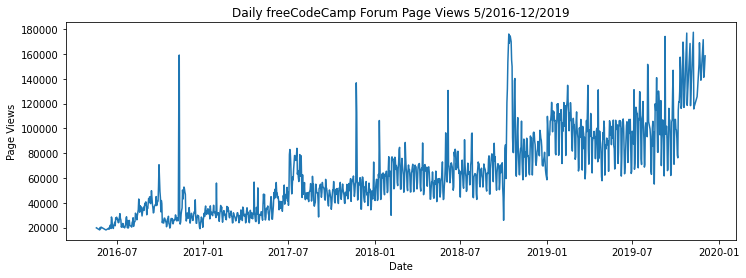

In [36]:

fig=plt.figure(figsize=(12,4))
plt.plot(df['date'], df['value'])
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
#now i save the chart as image
fig.savefig('line_plot.png')

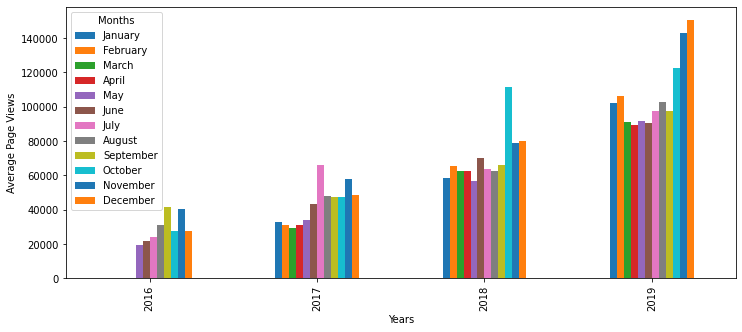

In [104]:
#df = df.set_index('date')

df.index = pd.to_datetime(df.index)
df['year']=df.index.year
df['month']=df.index.month
barChart=df.groupby(['year', 'month'],)['value'].mean()
barChart=barChart.unstack()



fig=barChart.plot.bar(legend=True, figsize=(12,5),ylabel='Average Page Views',xlabel='Years')


plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title = 'Months')
#fig.savefig('bar_plot.png') 

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

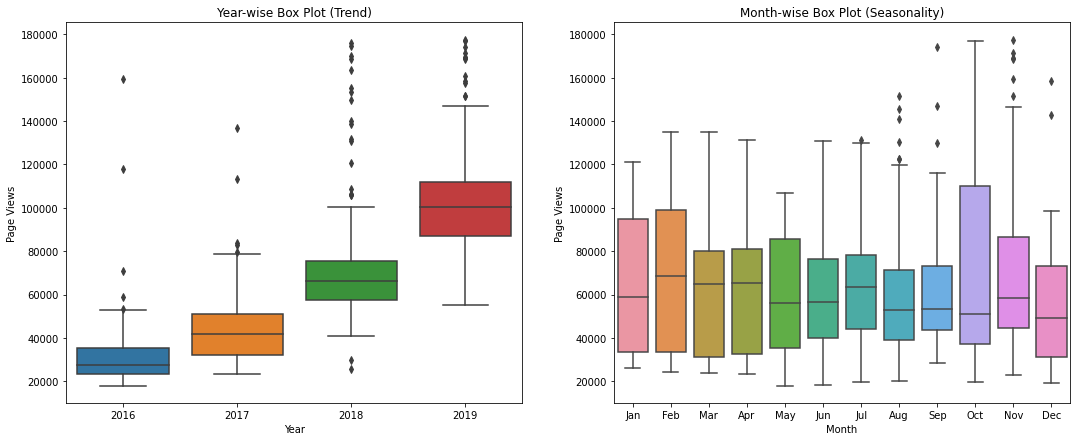

In [112]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
# Draw box plots (using Seaborn)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
fig,axis = plt.subplots(1,2)
fig.set_size_inches(18,7)
sns.boxplot(x = df_box['year'], y = df_box['value'], ax = axis[0]).set(xlabel='Year', ylabel='Page Views')
sns.boxplot(x = df_box['month'], y = df_box['value'], 
    order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'], 
    ax = axis[1]).set(xlabel='Month', ylabel='Page Views')
axis[0].set_title('Year-wise Box Plot (Trend)')
axis[1].set_title('Month-wise Box Plot (Seasonality)')